# Statisztika H√°zi 2024

A kiadott fileok b√°r valid csv fileok voltak, de valami√©rt beker√ºlt id√©z≈ëjelek k√∂z√© minden sor, √≠gy egy oszlopnak √©rz√©keli minden j√≥raval√≥ csv parser. El≈ësz√∂r kiszedtem ezeket a fileokb√≥l.

In [4]:
!pip install scipy scikit-learn numpy pandas matplotlib statsmodels seaborn

     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     ---- ---------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
     ------------------ ------------------- 143.4/294.9 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# 1. Feladat

In [6]:
df = pd.read_csv('bead1.csv')
df.columns=["csokol√°d√©", "gumicukor", "keksz", "fagylalt", "cukorka"]
df.head()

csokol√°d√©  gumicukor  keksz  fagylalt  cukorka
0       6.46       0.59   2.68      6.31     5.35
1       5.71       2.29   4.95      4.98     3.06
2       3.56       2.86   3.04      6.05    10.00
3       9.87       1.81   3.20      4.66     2.19
4       6.06       1.28   4.92      3.51     3.86

Az adatok bet√∂lt√©se ut√°n szem√ºgyre vettem ≈ëket. El≈ësz√∂r ellen≈ëriztem, hogy megfelel≈ë form√°tumban vannak-e, illetve, hogy van-e hi√°nyz√≥ adat. (Nem volt.)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   csokol√°d√©  50 non-null     float64
 1   gumicukor  50 non-null     float64
 2   keksz      50 non-null     float64
 3   fagylalt   50 non-null     float64
 4   cukorka    50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


Alap le√≠r√≥ statisztik√°k vizsg√°lata:

A gumicukor √©s a keksz √°tlagos cukortartalma alacsonyabb a t√∂bbin√©l.

In [8]:
df.describe()

csokol√°d√©  gumicukor      keksz   fagylalt    cukorka
count  50.000000  50.000000  50.000000  50.000000  50.000000
mean    4.425800   2.055200   2.904600   5.476600   5.409600
std     2.879298   1.655914   1.635708   2.125727   3.130664
min     0.520000   0.140000   0.170000   1.300000   1.370000
25%     1.870000   0.830000   1.567500   3.732500   2.885000
50%     3.770000   1.545000   2.735000   5.690000   4.335000
75%     6.097500   3.085000   4.005000   7.177500   9.670000
max     9.900000   6.710000   7.240000   9.210000  10.000000

## Hipot√©zisvizsg√°lat

A feladat, igaz√°b√≥l a k√∂vetkez≈ë: statisztikai teszttel igazolni, hogy az egyes √©dess√©gek cukor tartalmainak eloszl√°sa szignifik√°nsan elt√©r-e egym√°st√≥l.

A statisztikai tesztekn√©l fontos, hogy felt√©telezhet≈ë-e az adatok normalit√°sa. Erre a feladat sz√∂vege alapj√°n nem k√∂vetkeztettem, ez√©rt el≈ësz√∂r vizu√°lis m√≥dszerekkel vizsg√°ltam az adatok eloszl√°s√°t:
- histogram
- Q-Q diagram
- Box diagram

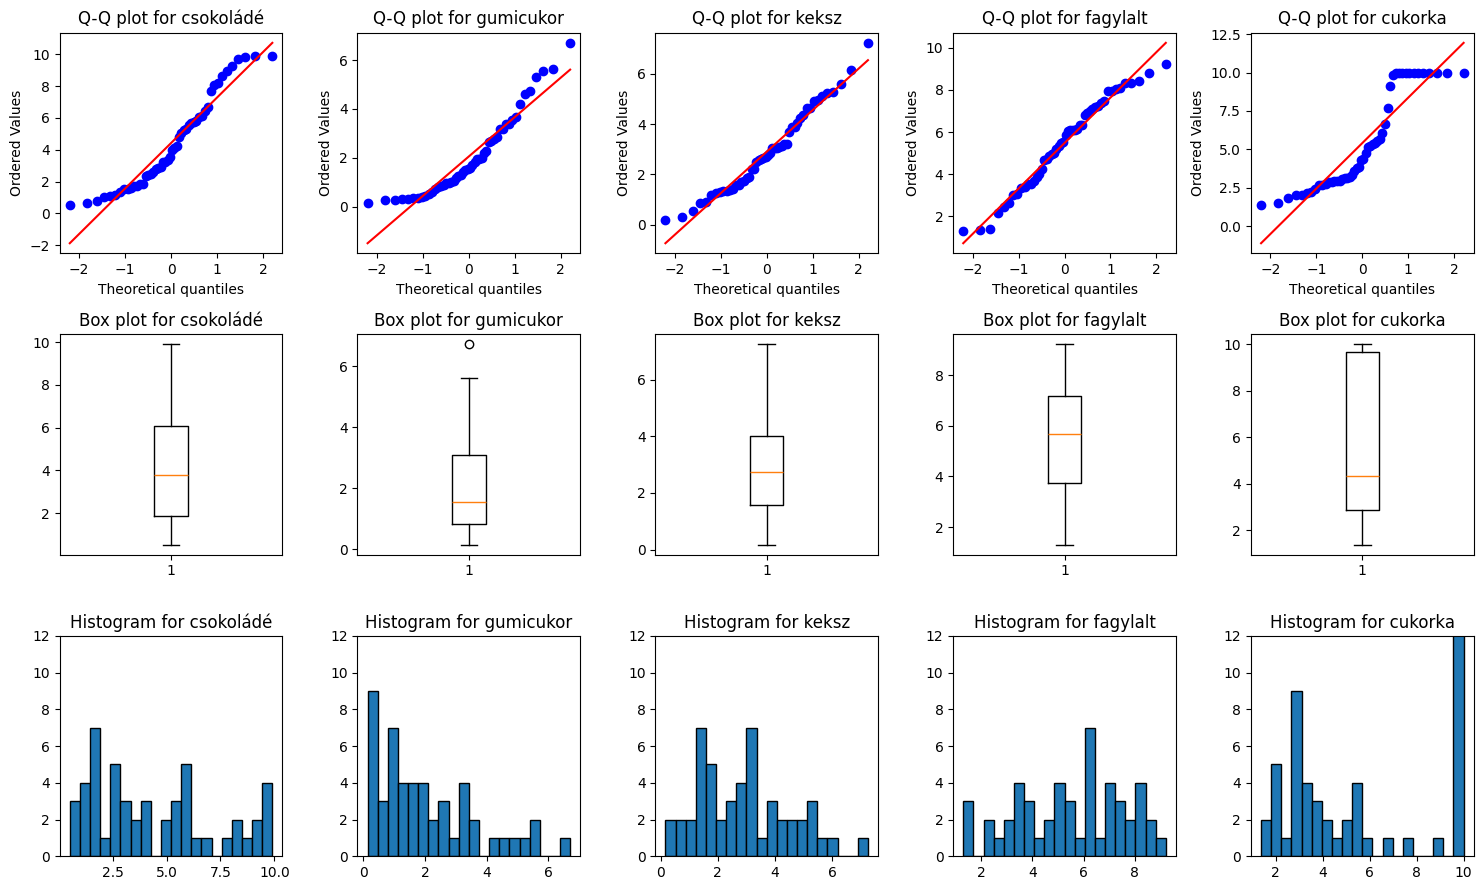

In [9]:
num_cols = len(df.columns)

# Create a figure with subplots
fig, axes = plt.subplots(3, num_cols, figsize=(3 * num_cols, 3*3))

# Plot Q-Q plots, box plots, and histograms for each column
for i, col in enumerate(df.columns):
    # Q-Q plot
    stats.probplot(df[col], dist="norm", plot=axes[0, i])
    axes[0, i].set_title(f'Q-Q plot for {col}')
    
    # Box plot
    axes[1, i].boxplot(df[col])
    axes[1, i].set_title(f'Box plot for {col}')
    
    # Histogram
    axes[2, i].hist(df[col], bins=20, edgecolor='k')
    axes[2, i].set_title(f'Histogram for {col}')
    axes[2, i].set_ylim(0, 12)

# Adjust layout
plt.tight_layout()
plt.show()

A vizu√°lis tesztek alapj√°n a csokol√°d√©, gumicukor √©s cukorka nem t≈±nik norm√°lis eloszl√°s√∫nak. (A t√∂bbir≈ël elk√©pzelhet≈ë.)

Alkalmazott tesztek:

- Shapiro-Wilk: Kis mintasz√°mra nagyon √©rz√©keny.
- Kolmogorov-Szmirnov: Nagyobb mint√°kra jobban m≈±k√∂dik.

Megjegyz√©s: itt a mintam√©ret pont a hat√°ron mozog, ez√©rt mindkett≈ët alkalmazom.

In [10]:
# Shapiro-Wilk test
for column in df.columns:
    print(column)
    stat, p = stats.shapiro(df[column])
    print(f'Shapiro-Wilk test for {column}: Statistics={stat}, p={p}')
    print('Gaussian' if p > 0.05 else 'not Gaussian')
    
    stat, p = stats.kstest(df[column], 'norm')
    print(f'Kolmogorov-Smirnov test for {column}: Statistics={stat}, p={p}')
    print('Gaussian' if p > 0.05 else 'not Gaussian')
    print()
    print()

csokol√°d√©
Shapiro-Wilk test for csokol√°d√©: Statistics=0.9207507402886187, p=0.002510198211111159
not Gaussian
Kolmogorov-Smirnov test for csokol√°d√©: Statistics=0.7969916355360216, p=1.3541583493009124e-34
not Gaussian


gumicukor
Shapiro-Wilk test for gumicukor: Statistics=0.8963838006123647, p=0.00036577811375131363
not Gaussian
Kolmogorov-Smirnov test for gumicukor: Statistics=0.5787063256829237, p=2.0563747763314662e-16
not Gaussian


keksz
Shapiro-Wilk test for keksz: Statistics=0.9671433676514914, p=0.17668849756549837
Gaussian
Kolmogorov-Smirnov test for keksz: Statistics=0.7829768039768913, p=5.123302178166496e-33
not Gaussian


fagylalt
Shapiro-Wilk test for fagylalt: Statistics=0.9682123031160361, p=0.1955777702380786
Gaussian
Kolmogorov-Smirnov test for fagylalt: Statistics=0.9238226166278338, p=2.468422752668254e-56
not Gaussian


cukorka
Shapiro-Wilk test for cukorka: Statistics=0.8330440812060037, p=5.5434011566306335e-06
not Gaussian
Kolmogorov-Smirnov test for cuko

Az eredm√©nyek al√°t√°masztj√°k a vizu√°lis intu√≠ci√≥t. Adott 0.05-√∂s szignifikancia szint mellett val√≥ban elvethet≈ë a norm√°lis eloszl√°s t√©nye a csoki, gumicukor √©s cukorka eset√©ben, illetve a marad√©k esetekben nem egyezik a k√©t teszt eredm√©nye (hat√°reset).

Mindenesetre az adatok normalit√°sa nem felt√©telezhet≈ë, ez√©rt nemparam√©teres pr√≥b√°t alkalmazok az eloszl√°sok √∂sszevet√©s√©re. Tov√°bb√° mivel nem 5 f√ºggetlen mint√°r√≥l van sz√≥, ez√©rt Kruskal-Wallis tesztet alkalmazok.

In [11]:
# Perform the Kruskal-Wallis test
stat, p = stats.kruskal(*[df[col] for col in df.columns])

print(f'Kruskal-Wallis H-test statistic: {stat}')
print(f'p-value: {p}')

if p < 0.05:
    print('There is a significant difference between the distributions of the columns (reject H0)')
else:
    print('There is no significant difference between the distributions of the columns (fail to reject H0)')

Kruskal-Wallis H-test statistic: 68.1814444597641
p-value: 5.492622584933163e-14
There is a significant difference between the distributions of the columns (reject H0)


## Post-hoc tesztek

A sejt√©seket igazolva, a teszt 0.05-√∂s szignifikancia szint mellett elveti, hogy a mint√°k egy eloszl√°sb√≥l j√∂ttek volna. Teh√°t van szignifik√°ns k√ºl√∂nbs√©g a cukor tartalmakban. A tov√°bbiakban post-hoc teszteket futtatok, ehhez a nemparam√©teres pr√≥b√°k k√∂z√ºl a Mann-Whitney lesz a megfelel≈ë.

In [12]:
# Perform pairwise Mann-Whitney U tests
results = []
columns = df.columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        stat, p = stats.mannwhitneyu(df[columns[i]], df[columns[j]])
        similar = "similar" if p > 0.05 else "different"
        results.append({
            'Column1': columns[i],
            'Column2': columns[j],
            'U-statistic': stat,
            'p-value': p,
            'similarity': similar
        })

results_df = pd.DataFrame(results)
print("\nPairwise Mann-Whitney U test results:")
results_df



Pairwise Mann-Whitney U test results:


Column1    Column2  U-statistic       p-value similarity
0  csokol√°d√©  gumicukor       1901.5  7.190926e-06  different
1  csokol√°d√©      keksz       1607.5  1.384942e-02  different
2  csokol√°d√©   fagylalt        922.5  2.417649e-02  different
3  csokol√°d√©    cukorka        981.5  6.443487e-02    similar
4  gumicukor      keksz        852.0  6.137054e-03  different
5  gumicukor   fagylalt        271.5  1.559232e-11  different
6  gumicukor    cukorka        399.5  4.495334e-09  different
7      keksz   fagylalt        444.5  2.862014e-08  different
8      keksz    cukorka        652.5  3.801148e-05  different
9   fagylalt    cukorka       1356.5  4.645448e-01    similar

# 2. Feladat

## 0. Adatok vizsg√°lata

In [13]:
df = pd.read_csv('bead2.csv')
df.head()

Y   X_1   X_2
0  1.55  0.90  0.71
1  6.70  8.35  8.51
2  2.78  3.21  3.44
3  2.25  1.87  1.70
4  0.00  0.41  0.60

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       50 non-null     float64
 1   X_1     50 non-null     float64
 2   X_2     50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [15]:
df.describe()

Y       X_1        X_2
count  50.000000  50.00000  50.000000
mean    3.439800   4.74780   4.787200
std     2.346459   3.05704   3.020503
min     0.000000   0.05000   0.000000
25%     1.597500   1.77250   1.647500
50%     3.125000   5.39500   5.420000
75%     5.540000   6.91750   7.000000
max     7.590000   9.37000   9.420000

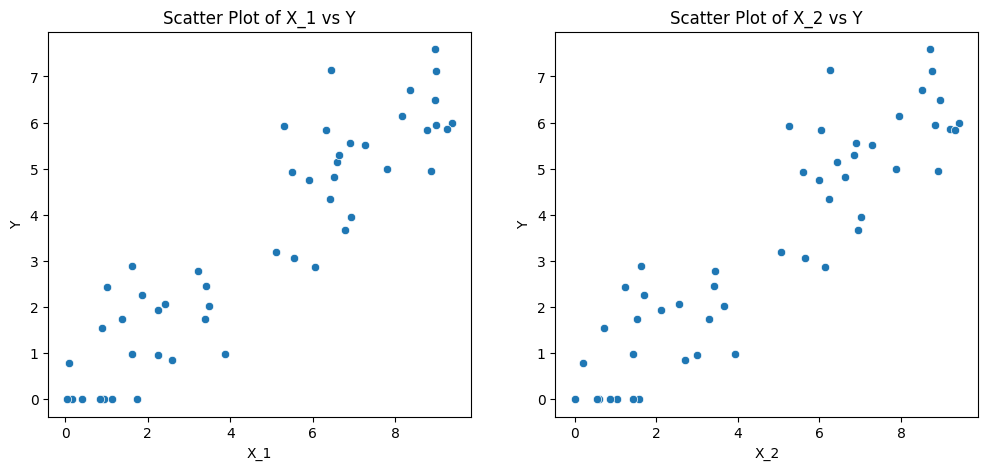

In [213]:
# Scatter plots to visualize relationships between columns
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['X_1'], y=df['Y'])
plt.title('Scatter Plot of X_1 vs Y')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['X_2'], y=df['Y'])
plt.title('Scatter Plot of X_2 vs Y')
plt.show()

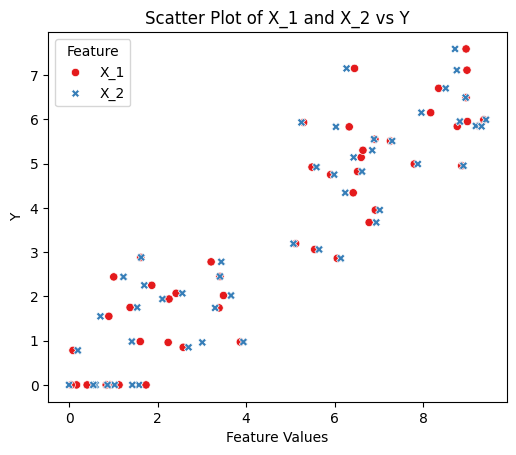

In [17]:
df_melted = pd.melt(df, id_vars='Y', value_vars=['X_1', 'X_2'], 
                    var_name='Feature', value_name='Value')

# Create a scatter plot with different colors for X_1 and X_2
sns.scatterplot(data=df_melted, x='Value', y='Y', hue='Feature', style='Feature', palette='Set1')

plt.title('Scatter Plot of X_1 and X_2 vs Y')
plt.xlabel('Feature Values')
plt.ylabel('Y')

# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

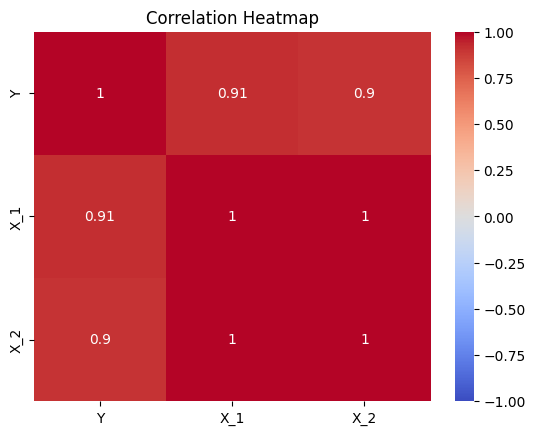

In [18]:
# Correlation analysis
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

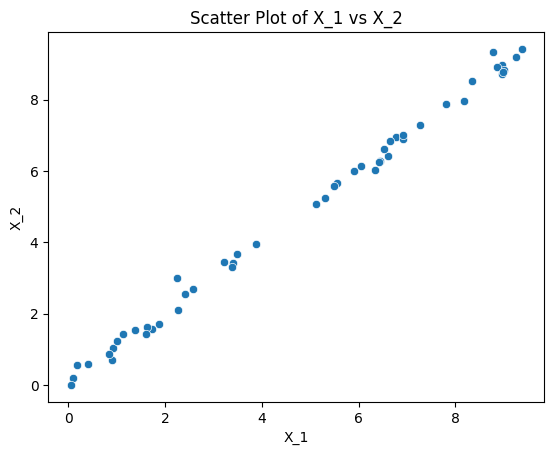

In [19]:
# Scatter plot of X_1 vs X_2 to check for multicollinearity
sns.scatterplot(x=df['X_1'], y=df['X_2'])
plt.title('Scatter Plot of X_1 vs X_2')
plt.show()

A le√≠r√≥ statisztik√°k nagy hasonl√≥s√°got mutatnak a k√©t magyar√°z√≥ v√°ltoz√≥ tekintet√©ben. Amire a tov√°bbi vizu√°liz√°ci√≥k is r√°mutatnak. Ennek felt√©telezett oka, hogy az √©dess√©gek kal√≥ria tartalm√°t f≈ëk√©nt a cukor adja, √≠gy a kett≈ë √©rt√©k er≈ësen korrel√°lt val√≥ban. (Ritka esetek egyike, amikor a magas korrel√°ci√≥ mellett val√≥ban ok-okozati viszony van.)

## 1. Becsl√©sek

### Egy√ºtthat√≥k pontbecsl√©se

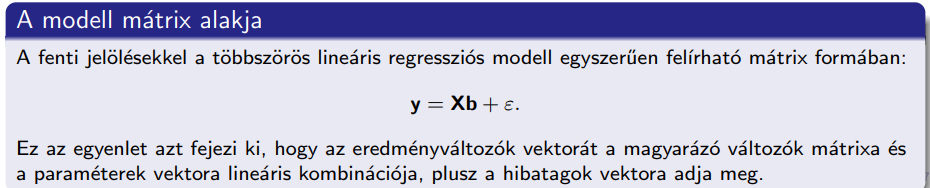

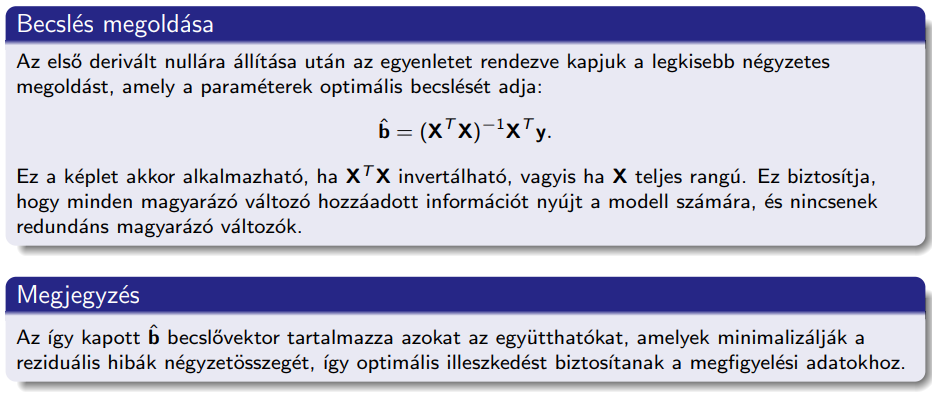

In [29]:
X_ = df[['X_1', 'X_2']].values
ones_column = np.ones((X_.shape[0], 1))
X = np.hstack((ones_column, X_))

print("Egy√ºtthat√≥k pontbecsl√©se:")
b = np.linalg.inv(X.T @ X) @ X.T @ df['Y'].values
print(b)
print()
print("Standardiz√°lt egy√ºtthat√≥k:")
y_d, *x_d = df[["Y", "X_1", "X_2"]].std().values
b_ = x_d/y_d * b[1:]
print(f"Beta_X_1={round(b_[0], 2)}, Beta_X_2={round(b_[1], 2)}")
print()
print("Modell: ")
print(f"Y = {round(b[0], 2)} + {round(b[1], 2)}*X_1 + ({round(b[2], 2)})*X_2")

Egy√ºtthat√≥k pontbecsl√©se:
[ 0.25099416  2.02732984 -1.3445335 ]

Standardiz√°lt egy√ºtthat√≥k:
Beta_X_1=2.64, Beta_X_2=-1.73

Modell: 
Y = 0.25 + 2.03*X_1 + (-1.34)*X_2


B√°r a magyar√°z√≥ v√°ltoz√≥k el√©gg√© korrel√°ltak, a standardiz√°lt egy√ºtthat√≥k megmutatj√°k, hogy ...

### El≈ërejelz√©s k√©sz√≠t√©se

A modell ilyen √©rt√©kekre nem fog j√≥l m≈±k√∂dni, mert illeszt√©s sor√°n az X_1 √©s X_2 v√°ltoz√≥k csak egy kis tartom√°ny√°t vizsg√°ltuk. Az hogy az adatok egy kis tartom√°nyon line√°ris kapcsolatot sejtetnek, nem jelenti hogy kiterjesztett esetben is.

S≈ët ez nyilv√°n v√°rhat√≥ is mivel Y tartom√°nya 0-10, akkor hi√°ba line√°risan n≈ë ha a kal√≥ria tartalom is 0-10 k√∂z√∂tt van, de ha kil√©p√ºnk a tartom√°nyb√≥l Y akkor is maximum 10 lehet.

Ilyenkor tippelhet√ºnk p√©ld√°ul a tartom√°nyhat√°rokra, vagy sk√°l√°zhatjuk a magyar√°z√≥ v√°ltoz√≥kat (pl.: kal√≥ria -> log(kal√≥ria)), de ekkor is fenn√°llhat hogy a line√°ris modell nem j√≥l illeszkedik.

In [30]:
print(f"El≈ërejelz√©s X_1=450, X_2=30 => Y={np.array([1., 450., 30.]) @ b}")

El≈ërejelz√©s X_1=450, X_2=30 => Y=872.2134153169116


### Konfidenciaintervallum az egy√ºtthat√≥kra

Els≈ë l√©p√©sk√©nt sz√°moljuk ki a becs√ºlt hibavarianci√°t/sz√≥r√°st, melyre sz√ºks√©g lesz a tov√°bbiakban.

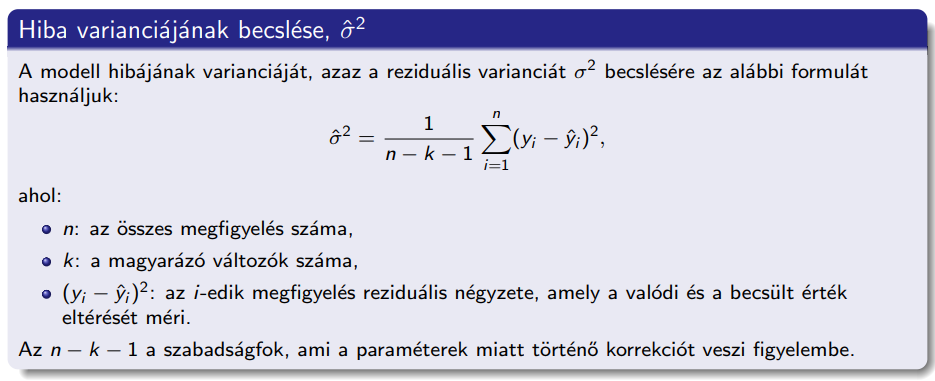

In [43]:
Y = df["Y"].values
e = Y - (X @ b)

n, k_ = X.shape
k = k_ - 1 # k denotes the number of feature variables

sigma_2 = e.var(ddof=k + 1) # sqrt(sum(e**2) / (n - k - 1))

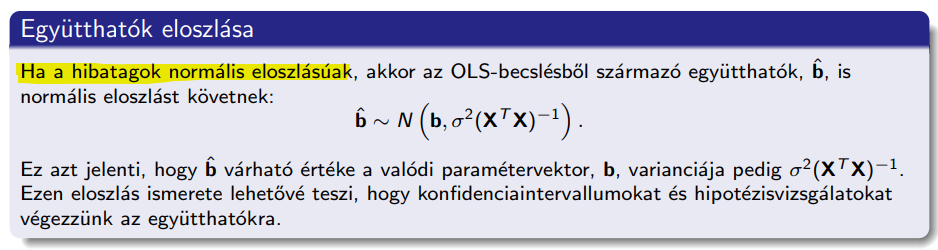

A hibatagok normalit√°s√°t √©s egy√©b tulajdons√°gait egy k√©s≈ëbbi r√©szfeladatban vizsg√°lom.

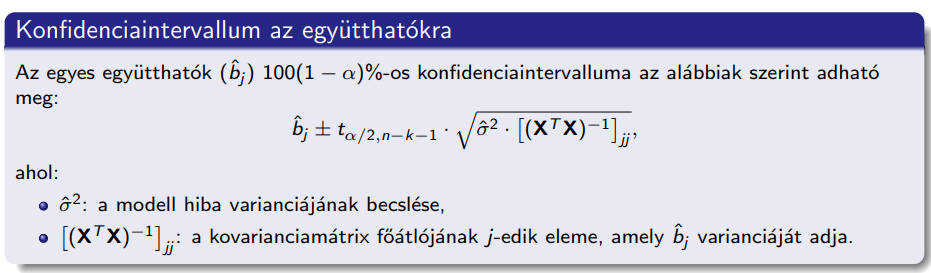

A param√©terek konfidenciaintervalluma t-eloszl√°s szerint becs√ºlhet≈ë, mivel a sz√≥r√°st az adatokb√≥l becs√ºlt√ºk.

In [45]:
alpha = 0.05  # 95% confidence interval

coeffs = np.sqrt(sigma_2*np.diag(np.linalg.inv(X.T @ X)))
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1))  # Two-tailed
confidence_intervals = np.array([
    [b[i] - t_critical * coeffs[i], b[i] + t_critical * coeffs[i]]
    for i in range(len(b))
])

print("Konfidencia intervallumok az egyes param√©terekre:")
pd.DataFrame({
    'Coefficient': ['Intercept', 'X_1', 'X_2'],
    'Estimate': b,
    '95% CI Lower': confidence_intervals[:, 0],
    '95% CI Upper': confidence_intervals[:, 1]
})

Konfidencia intervallumok az egyes param√©terekre:


Coefficient  Estimate  95% CI Lower  95% CI Upper
0   Intercept  0.250994     -0.262926      0.764915
1         X_1  2.027330      0.689020      3.365640
2         X_2 -1.344533     -2.699031      0.009964

### El≈ërejelz√©si intervallum

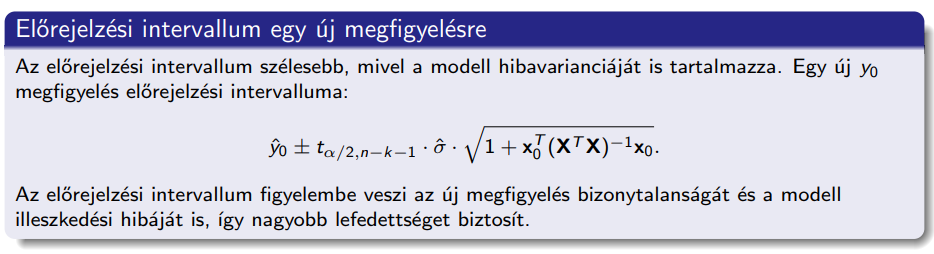

... √≠gy nagyobb lefedetts√©get biztos√≠t, mint a konfidencia intervallum a becsl√©sre. (Nem √∂sszekeverend≈ë az el≈ëz≈ë r√©szfeladatban, param√©tere sz√°molt konfidencia intervallummal.)

In [46]:
x0 = np.array([1., 450., 30.])
y0 = x0 @ b

In [53]:
alpha = 0.05  # 95% confidence interval
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1)) # Two-tailed
delta = t_critical * np.sqrt(sigma_2) * np.sqrt(1 + (x0.T @ np.linalg.inv(X.T @ X) @ x0))
(round(y0 - delta, 2), round(y0 + delta, 2))

(np.float64(310.4), np.float64(1434.03))

## 2. Illeszked√©s diagnosztika

### Determin√°ci√≥s egy√ºtthat√≥, √©s korrig√°lt v√°ltozata:

Az R^2 azt jelzi, hogy a modell √°ltal tartalmazott magyar√°z√≥ v√°ltoz√≥k mennyire j√°rulnak hozz√° az eredm√©nyv√°ltoz√≥ el≈ërejelz√©s√©hez. Min√©l magasabb az ann√°l t√∂bb inform√°ci√≥t nyer√ºnk a modellb≈ël a magyar√°z√≥ v√°ltoz√≥kr√≥l. √ârt√©kk√©szlete: [0,1]

In [55]:
Y_hat = (X @ b)
Y = df["Y"].values
SST = np.sum((Y - Y_hat.mean())**2)
SSR = np.sum((Y_hat - Y_hat.mean())**2)
SSE = e.T @ e

assert SSR + SSE - SST < 1e-10

In [56]:
R2 = SSR/SST
R2

np.float64(0.8486364793397232)

Az R^2 √©rt√©ke mindig n√∂vekszik, amikor √∫jabb magyar√°z√≥ v√°ltoz√≥t adunk a modellhez, m√©g akkor is, ha az √∫j v√°ltoz√≥ nem ad l√©nyeges inform√°ci√≥t az eredm√©nyv√°ltoz√≥r√≥l. Ez√©rt k√∂r√ºltekint≈ë v√°ltoz√≥v√°laszt√°s sz√ºks√©ges, hogy csak val√≥ban relev√°ns t√©nyez≈ëk ker√ºljenek be a modellbe.

Ha t√∫l sok irrelev√°ns v√°ltoz√≥t adunk a modellhez:

- n√∂velj√ºk a modell komplexit√°s√°t,
- megnehez√≠thetj√ºk az elemz√©st,
- √©s cs√∂kkenthetj√ºk a modell √°ltal√°nos√≠that√≥s√°g√°t.

A c√©l:

Egy olyan modell kialak√≠t√°sa, amely a lehet≈ë legkevesebb v√°ltoz√≥val magyar√°zza a lehet≈ë legt√∂bb inform√°ci√≥t.

Megold√°s:

Az **adjust√°lt R^2** egy m√≥dos√≠tott m√©r≈ësz√°m, amely figyelembe veszi a modell v√°ltoz√≥inak sz√°m√°t.

Ellent√©tben a sima R^2-tel, az adjust√°lt R^2 cs√∂kkenhet is, ha egy √∫j prediktor nem j√°rul √©rdemben hozz√° a modell teljes√≠tm√©ny√©hez. Ez√°ltal v√©d a t√∫lilleszt√©s ellen:

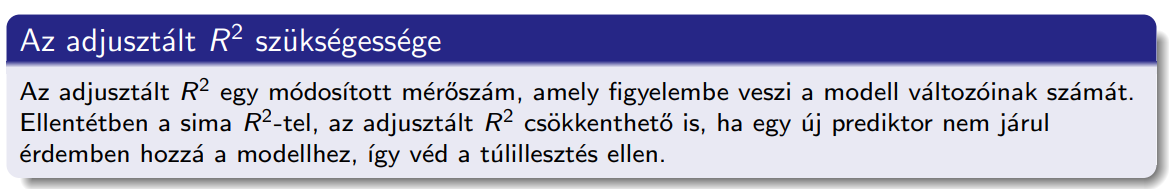

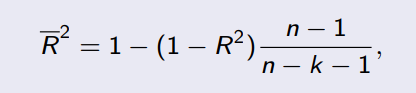

In [58]:
n, k_ = X.shape
k = k_ - 1
R2_ = 1-(1-R2)*((n-1)/(n-k-1))
R2_

np.float64(0.8421954784605625)

Ezzel m√°r √©rdemben meg lehetne vizsg√°lni, hogy X_2 magyar√°z√≥ v√°ltoz√≥ n√©lk√ºl vajon n≈ë vagy cs√∂kken az adjuszt√°lt R_2.

## 3. Modelldiagnosztika

### Modelldiagnosztikai tesztek

Modell szignifikanci√°ja:

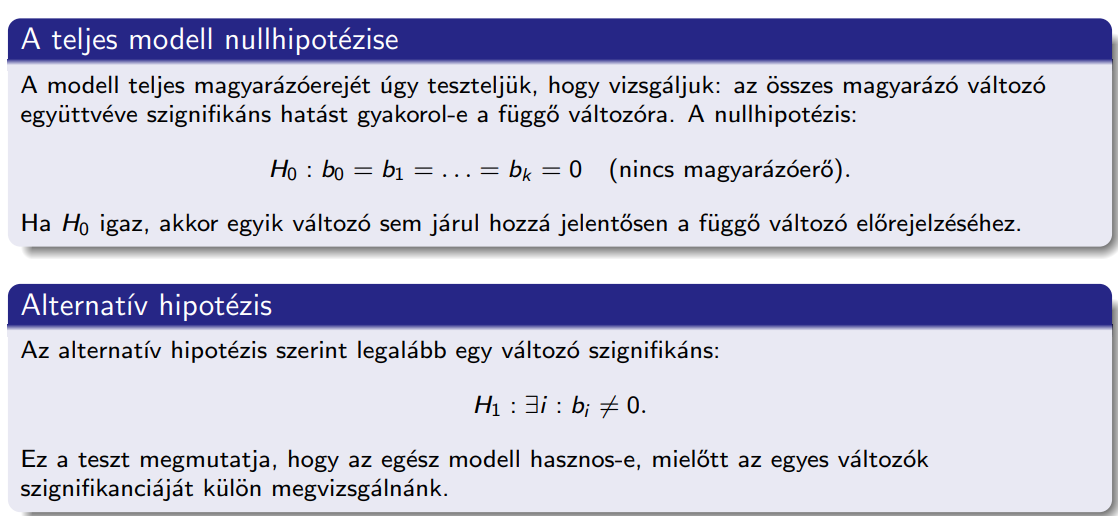

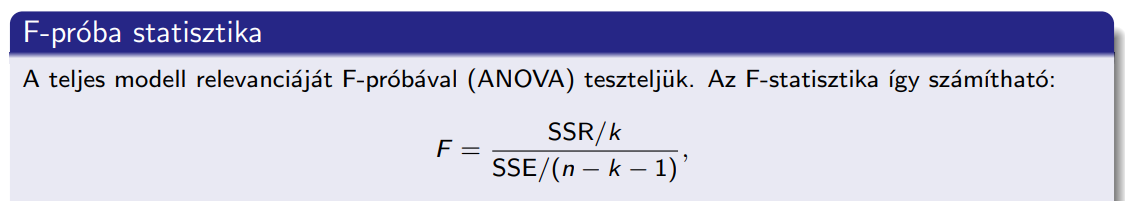

In [71]:
alpha = 0.05

F = (SSR/k) / (SSE/(n-k-1))
F_critical = stats.f.ppf(1-alpha, dfn=k, dfd=n-k-1)
if F > F_critical:
    print(f'Reject H0, F={F} > F_critical={F_critical}')
    print('A modellnek van relev√°ns magyar√°z√≥ ereje')
else:
    print(f'Fail to reject H0, F={F} < F_critical={F_critical}')
    print('A modellnek nincs relev√°ns magyar√°z√≥ ereje')

Reject H0, F=85.96804540352328 > F_critical=2.806844928806253
A modellnek van relev√°ns magyar√°z√≥ ereje


### V√°ltoz√≥k szignifikanci√°j√°nak tesztel√©se

In [65]:
sigma_squared = np.sum(e**2) / (n-k-1)
se_beta = np.sqrt(np.diag(sigma_squared * np.linalg.inv(X.T @ X)))
alpha = 0.05  # 95% confidence interval
t_critical = stats.t.ppf(1 - alpha / 2, df=(n-k-1))  # Two-tailed
print(f"t_critical={t_critical}")

t_stat = b / se_beta

pd.DataFrame({
    'Variable': ['X_1', 'X_2'],
    't-statistic': t_stat[1:],
    'significance': ['significant' if np.abs(t) > t_critical else 'not significant' for t in t_stat[1:]]
})

t_critical=2.0117405137297655


Variable  t-statistic     significance
0      X_1     3.047472      significant
1      X_2    -1.996941  not significant

X_2-nak nem jelent≈ës a hat√°sa. Ez is arra utal, hogy nem √©rdemes bent hagyni X_1 mellett.

### Multikollinearit√°s vizsg√°lata:

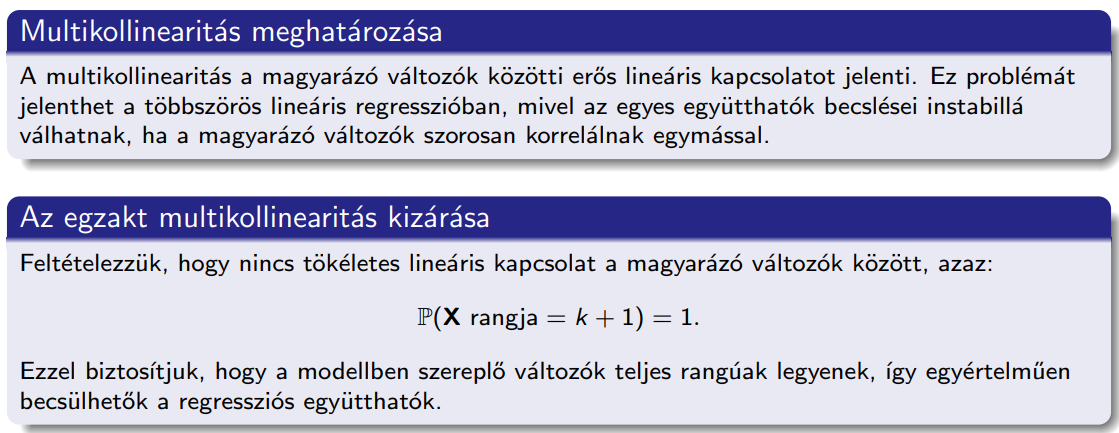

A multikollinearit√°s instabilit√°st okozhat line√°ris regresszi√≥ban, mert az er≈ësen korrel√°lt f√ºggetlen v√°ltoz√≥k k√∂z√∂tt neh√©z megk√ºl√∂nb√∂ztetni, hogy melyik v√°ltoz√≥ milyen m√©rt√©kben j√°rul hozz√° az eredm√©ny v√°ltoz√°s√°hoz. Ez a k√∂vetkez≈ë probl√©m√°khoz vezet:

- Pontatlan becsl√©sek a koefficiensekre
- Nagy variancia a koefficiensekben
- Gyeng√©bb predikt√≠v teljes√≠tm√©ny

Matematika h√°tt√©r: k√∂zel√≠t≈ë line√°ris f√ºggetlens√©g hi√°nya

Ha a f√ºggetlen v√°ltoz√≥k k√∂z√∂tt er≈ës korrel√°ci√≥ √°ll fenn, akkor (ùëã.ùëá @ ùëã) k√∂zel szingul√°ris lesz (vagyis majdnem nem invert√°lhat√≥). Ez az inverz sz√°m√≠t√°sa sor√°n nagyon nagy √©rt√©keket eredm√©nyezhet, ami instabil √©s megb√≠zhatatlan becsl√©sekhez vezet.

Megold√°s:

Magyar√°z√≥ v√°ltoz√≥k kidob√°sa, bizonyos metrik√°k alapj√°n pl.:

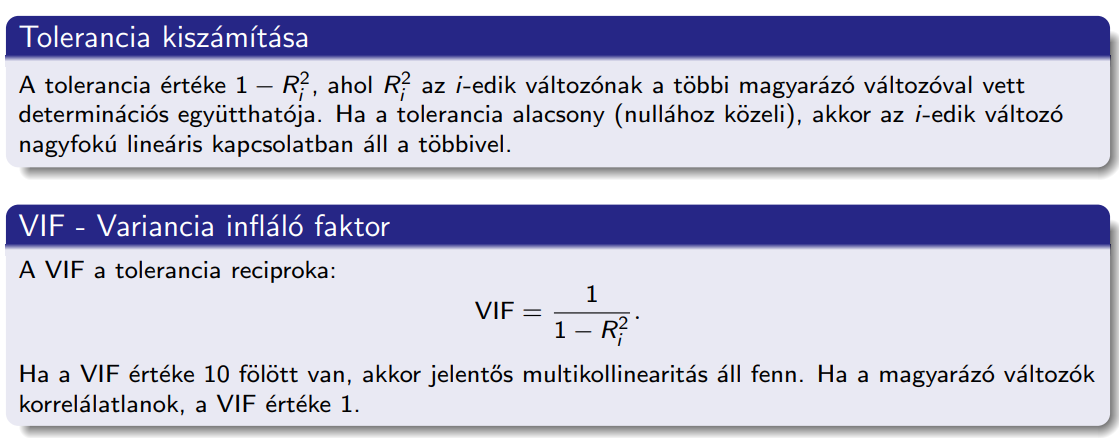

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(X, i) for i in range(X.shape[1])]

[np.float64(3.755539459929965),
 np.float64(233.25019699881355),
 np.float64(233.25019699881355)]

Egy√©rtelm≈±en l√°tszik ami a vizu√°lis inspekci√≥ sor√°n is: X_1 √©s X_2 er≈ësen korrel√°lt. Ki kellene dobni az egyiket!

### Hibatagok vizsg√°lata

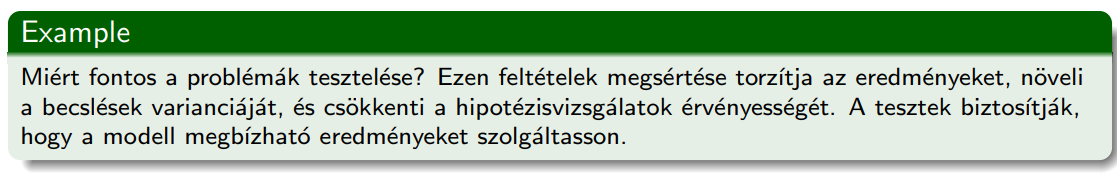

A t√°rgyon tanult modellben a becsl√©sek igazs√°ga f√ºgg a hibatagok n√©h√°ny tulajdons√°g√°t√≥l. Ezeket ebbena  r√©szfeladatban vizsg√°lom:

#### a. Normalit√°s

In [67]:
Y = df["Y"].values
e = Y - (X @ b)

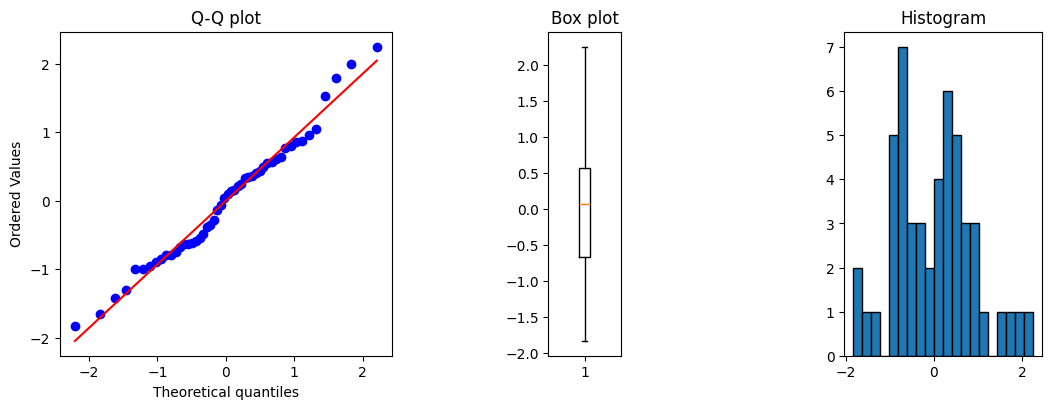

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Q-Q plot
stats.probplot(e, dist="norm", plot=axes[0])
axes[0].set_title('Q-Q plot')
axes[0].set_aspect('equal')

# Box plot
axes[1].boxplot(e)
axes[1].set_title('Box plot')
axes[1].set_aspect('equal')

# Histogram
axes[2].hist(e, bins=20, edgecolor='k')
axes[2].set_title('Histogram')
axes[2].set_aspect('equal')

# Adjust layout
plt.tight_layout()
plt.show()

Vizu√°lis m√≥dszerek alapj√°n norm√°lis eloszl√°s√∫nak t≈±nik, de vizsg√°ljuk meg statisztikai tesztekkel, hasonl√≥an az els≈ë feladathoz Shapiro-Wilk √©s Komogorov-Smirnov-ot haszn√°lok:

In [69]:
stat, p = stats.shapiro(e)
print(f'Shapiro-Wilk test for error: Statistics={stat}, p={p}')
print('Gaussian' if p > 0.05 else 'not Gaussian')

stat, p = stats.kstest(e, 'norm')
print(f'Kolmogorov-Smirnov test for error: Statistics={stat}, p={p}')
print('Gaussian' if p > 0.05 else 'not Gaussian')

Shapiro-Wilk test for error: Statistics=0.980307153439621, p=0.5649891819959421
Gaussian
Kolmogorov-Smirnov test for error: Statistics=0.07834942790756551, p=0.8950677240508212
Gaussian


#### b. V√°rhat√≥ √©rt√©k

t-pr√≥b√°val ellen≈ërizhet≈ë, hogy van-e szignifik√°ns elt√©r√©s a 0-hoz k√©pest:

- H0: nincs
- H1: van

In [73]:
mean_residual = np.mean(e)
std_residual = e.std(ddof=k+1)
SE = std_residual / np.sqrt(len(e))

alpha = 0.05
t_stat = mean_residual / SE
t_critical = stats.t.ppf(1 - alpha / 2, n-k-1)

print(f"Mean of residuals: {mean_residual}")
print(f"T-statistic: {t_stat}")
print(f"Critical value: ¬±{t_critical}")

if abs(t_stat) > t_critical:
    print("Reject the null hypothesis: The residuals do not have a zero mean.")
else:
    print("Fail to reject the null hypothesis: The residuals have a zero mean.")

Mean of residuals: -5.2098325653560095e-14
T-statistic: -3.9099031737149873e-13
Critical value: ¬±2.0128955989194286
Fail to reject the null hypothesis: The residuals have a zero mean.


#### c. Homoszkedaszticit√°s

In [74]:
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(e, X)

# Extract results
bp_stat = bp_test[0]       # Breusch-Pagan statistic
p_value = bp_test[1]       # p-value for the test

print(f"Breusch-Pagan statistic: {bp_stat}")
print(f"p-value: {p_value}")

# Interpret the result
if p_value < 0.05:
    print("Reject the null hypothesis: Residuals are heteroscedastic.")
else:
    print("Fail to reject the null hypothesis: Residuals are homoscedastic.")

Breusch-Pagan statistic: 0.8858042617729434
p-value: 0.6421700526262115
Fail to reject the null hypothesis: Residuals are homoscedastic.


A hibatagok varianci√°ja teh√°t konstant.

#### d. F√ºggetlens√©g

A Durbin-Watson teszt seg√≠ts√©g√©vel ellen≈ërizhetj√ºk, hogy van-e korrel√°ci√≥ a hibatagok k√∂z√∂tt:

In [75]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(e)

print(f"Durbin-Watson statistic: {dw_stat}")

# Interpret the result
if 1.5 < dw_stat < 2.5:
    print("Residuals are likely independent (no autocorrelation).")
else:
    print("Residuals may have autocorrelation (dependency).")

Durbin-Watson statistic: 2.4147400157386136
Residuals are likely independent (no autocorrelation).


## B√≥nusz: √ñnellen≈ërz√©s be√©p√≠tett library-vel:

In [98]:
import statsmodels.api as sm

X = df[['X_1', 'X_2']]
y = df['Y']

# Add a constant (intercept term) to the model
X_with_intercept = sm.add_constant(X)

# Fit the model using statsmodels
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary, which includes confidence intervals
print(model.summary())

# Extract confidence intervals directly
conf_intervals = model.conf_int(alpha=0.05)  # 95% CI by default
print("\nConfidence Intervals:")
conf_intervals


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     131.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           5.38e-20
Time:                        00:15:05   Log-Likelihood:                -65.885
No. Observations:                  50   AIC:                             137.8
Df Residuals:                      47   BIC:                             143.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2510      0.255      0.983      0.3

0         1
const -0.262926  0.764915
X_1    0.689020  3.365640
X_2   -2.699031  0.009964

# 3. Feladat